In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso  # ✅ CORRECTED: linear_model not linear_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("✅ Libraries imported successfully!\n")

✅ Libraries imported successfully!



In [9]:
df = pd.read_csv("insurance.csv")

print("=" * 80)
print("📊 DATASET LOADED")
print("=" * 80)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn names:", df.columns.tolist())
print("\n")

📊 DATASET LOADED
Shape: 1338 rows × 7 columns

First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Column names: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']




In [10]:
print("=" * 80)
print("🔧 HANDLING MISSING VALUES")
print("=" * 80)

num_cols = ['age', 'bmi', 'children']
cat_cols = ['sex', 'smoker', 'region']

print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Drop rows where target is missing
df = df.dropna(subset=["charges"])

# Fill missing values
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("✅ All missing values handled!\n")

🔧 HANDLING MISSING VALUES

Missing values before cleaning:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Missing values after cleaning:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
✅ All missing values handled!



In [11]:
print("=" * 80)
print("📋 SPLITTING FEATURES & TARGET")
print("=" * 80)

X = df.drop("charges", axis=1)
y = df["charges"]

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")
print(f"Target column: charges (insurance cost)")
print("\n")

📋 SPLITTING FEATURES & TARGET
Features (X): (1338, 6)
Target (y): (1338,)

Feature columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
Target column: charges (insurance cost)




In [12]:
print("=" * 80)
print("⚙️ CREATING PREPROCESSING PIPELINE")
print("=" * 80)

preprocess = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first", sparse_output=False), cat_cols),
    ("scale", StandardScaler(), num_cols)
], remainder='passthrough')

print("\n✅ Preprocessing steps:")
print("   1. OneHotEncoder for categorical columns:", cat_cols)
print("   2. StandardScaler for numerical columns:", num_cols)
print("\n")

⚙️ CREATING PREPROCESSING PIPELINE

✅ Preprocessing steps:
   1. OneHotEncoder for categorical columns: ['sex', 'smoker', 'region']
   2. StandardScaler for numerical columns: ['age', 'bmi', 'children']




In [13]:
print("=" * 80)
print("🤖 CREATING LASSO REGRESSION MODEL")
print("=" * 80)

model = Pipeline([
    ("preprocess", preprocess),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lasso", Lasso(alpha=0.01, max_iter=10000, random_state=42))
])

print("\n✅ Model pipeline created:")
print("   1. Preprocessing (OneHot + Scaling)")
print("   2. Polynomial Features (degree=2) - captures non-linear relationships")
print("   3. Lasso Regression (alpha=0.01) - regularization + feature selection")
print("\n")

🤖 CREATING LASSO REGRESSION MODEL

✅ Model pipeline created:
   1. Preprocessing (OneHot + Scaling)
   2. Polynomial Features (degree=2) - captures non-linear relationships
   3. Lasso Regression (alpha=0.01) - regularization + feature selection




In [14]:
print("=" * 80)
print("✂️ TRAIN/TEST SPLIT")
print("=" * 80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print("\n")

✂️ TRAIN/TEST SPLIT

Training set: 1070 samples (80.0%)
Testing set:  268 samples (20.0%)




In [15]:
print("=" * 80)
print("🎓 TRAINING MODEL...")
print("=" * 80)

model.fit(X_train, y_train)

print("\n✅ Model trained successfully!")
print("\n")

🎓 TRAINING MODEL...

✅ Model trained successfully!




In [16]:
print("=" * 80)
print("📊 MODEL EVALUATION")
print("=" * 80)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Testing metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("\n📈 TRAINING SET Performance:")
print("-" * 80)
print(f"   MAE:      ${train_mae:,.2f}")
print(f"   RMSE:     ${train_rmse:,.2f}")
print(f"   R² Score: {train_r2:.4f} ({train_r2*100:.2f}%)")

print("\n📊 TESTING SET Performance:")
print("-" * 80)
print(f"   MAE:      ${test_mae:,.2f}")
print(f"   RMSE:     ${test_rmse:,.2f}")
print(f"   R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")

print("\n💡 INTERPRETATION:")
print("-" * 80)
print(f"   • Model explains {test_r2*100:.1f}% of variance in insurance charges")
print(f"   • Average prediction error: ${test_mae:,.0f} (MAE)")
print(f"   • Root mean squared error: ${test_rmse:,.0f} (RMSE)")

# Check overfitting
if abs(train_r2 - test_r2) < 0.05:
    print(f"\n   ✅ Good fit! No significant overfitting")
    print(f"      Training R²: {train_r2:.4f}, Testing R²: {test_r2:.4f}")
elif train_r2 > test_r2 + 0.1:
    print(f"\n   ⚠️  Possible overfitting detected")
    print(f"      Training R²: {train_r2:.4f}, Testing R²: {test_r2:.4f}")
else:
    print(f"\n   ℹ️  Model performance difference: {abs(train_r2-test_r2):.4f}")

print("\n")

📊 MODEL EVALUATION

📈 TRAINING SET Performance:
--------------------------------------------------------------------------------
   MAE:      $2,892.16
   RMSE:     $4,778.19
   R² Score: 0.8418 (84.18%)

📊 TESTING SET Performance:
--------------------------------------------------------------------------------
   MAE:      $2,729.48
   RMSE:     $4,551.08
   R² Score: 0.8666 (86.66%)

💡 INTERPRETATION:
--------------------------------------------------------------------------------
   • Model explains 86.7% of variance in insurance charges
   • Average prediction error: $2,729 (MAE)
   • Root mean squared error: $4,551 (RMSE)

   ✅ Good fit! No significant overfitting
      Training R²: 0.8418, Testing R²: 0.8666




📈 CREATING VISUALIZATIONS...


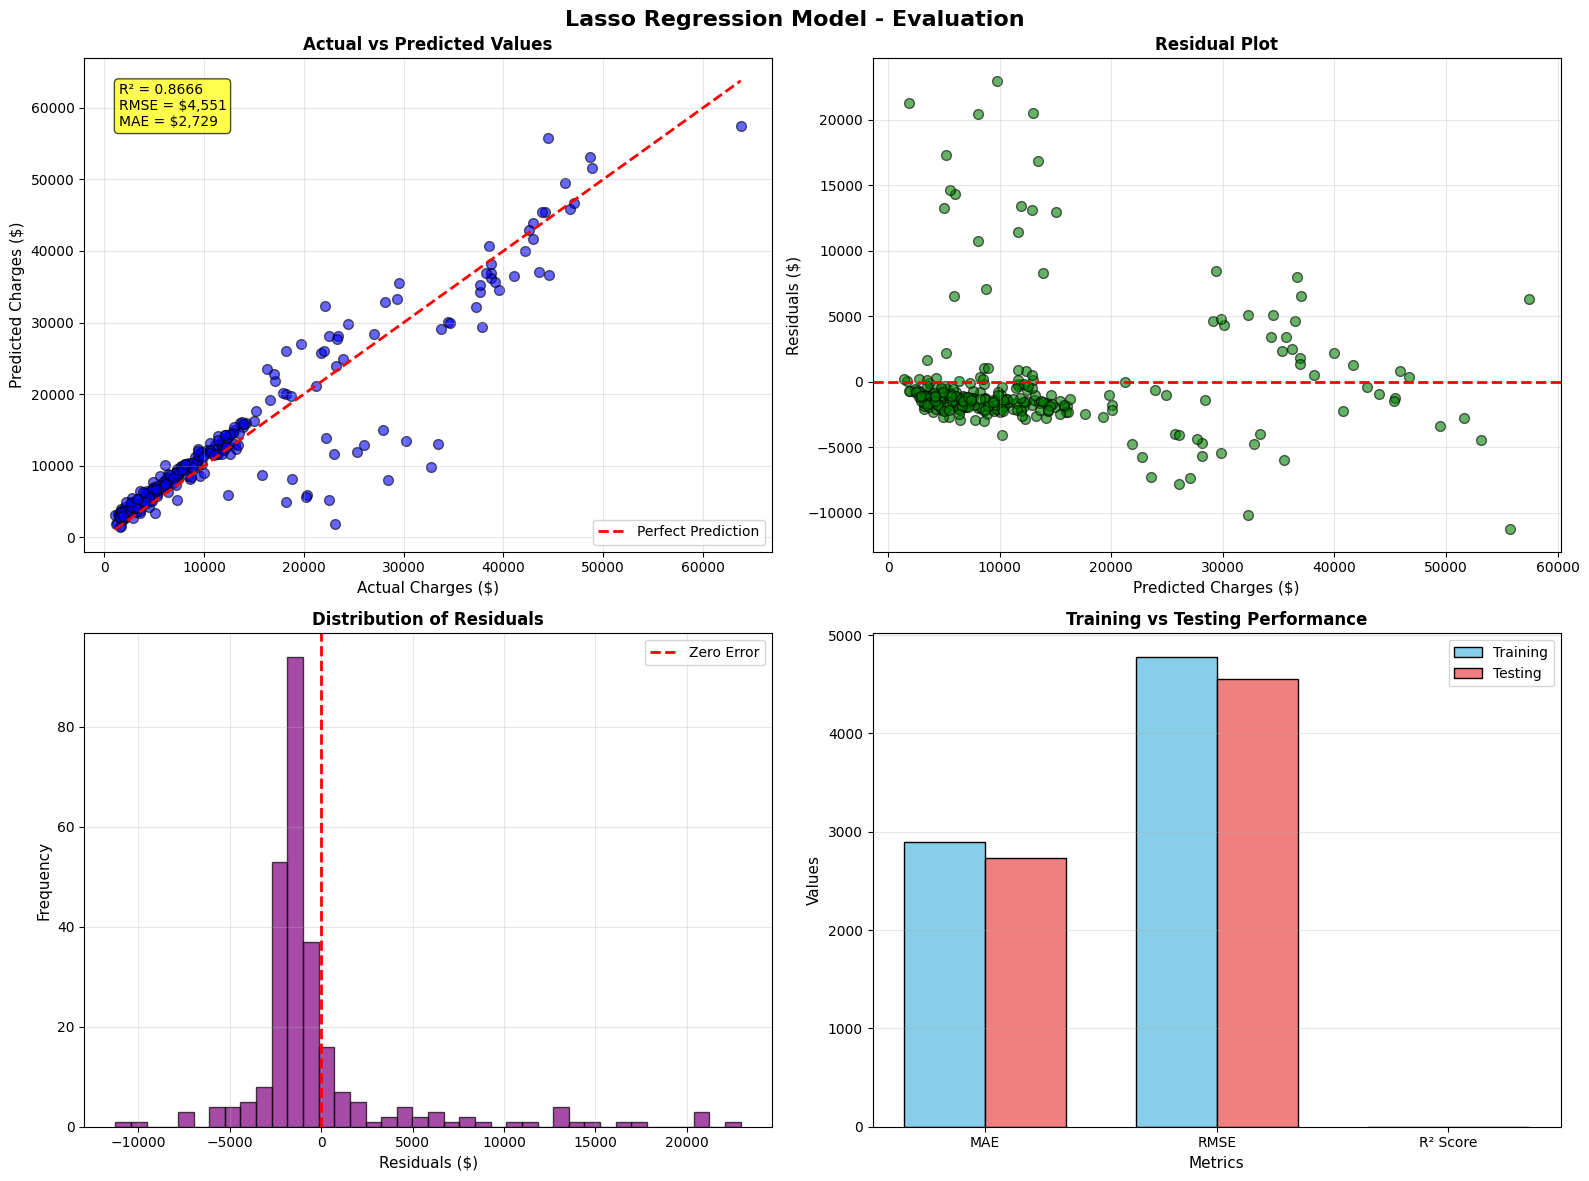

✅ Visualizations created!



In [17]:
print("=" * 80)
print("📈 CREATING VISUALIZATIONS...")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Lasso Regression Model - Evaluation', fontsize=16, fontweight='bold')

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.6, color='blue',
                   edgecolors='black', s=50)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Charges ($)', fontsize=11)
axes[0, 0].set_ylabel('Predicted Charges ($)', fontsize=11)
axes[0, 0].set_title('Actual vs Predicted Values', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)
axes[0, 0].text(0.05, 0.95,
                f'R² = {test_r2:.4f}\nRMSE = ${test_rmse:,.0f}\nMAE = ${test_mae:,.0f}',
                transform=axes[0, 0].transAxes, fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 2. Residuals Plot
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.6, color='green',
                   edgecolors='black', s=50)
axes[0, 1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Charges ($)', fontsize=11)
axes[0, 1].set_ylabel('Residuals ($)', fontsize=11)
axes[0, 1].set_title('Residual Plot', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# 3. Residuals Distribution
axes[1, 0].hist(residuals, bins=40, color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=0, color='red', linestyle='--', lw=2, label='Zero Error')
axes[1, 0].set_xlabel('Residuals ($)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Distribution of Residuals', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Training vs Testing Comparison
metrics = ['MAE', 'RMSE', 'R² Score']
train_values = [train_mae, train_rmse, train_r2]
test_values = [test_mae, test_rmse, test_r2]

x_pos = np.arange(len(metrics))
width = 0.35

axes[1, 1].bar(x_pos - width/2, train_values, width, label='Training',
               color='skyblue', edgecolor='black')
axes[1, 1].bar(x_pos + width/2, test_values, width, label='Testing',
               color='lightcoral', edgecolor='black')
axes[1, 1].set_xlabel('Metrics', fontsize=11)
axes[1, 1].set_ylabel('Values', fontsize=11)
axes[1, 1].set_title('Training vs Testing Performance', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(metrics)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualizations created!\n")

In [18]:
print("=" * 80)
print("🔮 PREDICTION EXAMPLES")
print("=" * 80)

# Example 1: Non-smoker
example1 = pd.DataFrame({
    'age': [30],
    'sex': ['male'],
    'bmi': [25.0],
    'children': [1],
    'smoker': ['no'],
    'region': ['southwest']
})

pred1 = model.predict(example1)[0]

print("\n👤 Example 1: Non-smoker")
print("-" * 80)
print("   Age: 30, Male, BMI: 25.0, Children: 1")
print("   Smoker: NO, Region: Southwest")
print(f"   💰 Predicted Cost: ${pred1:,.2f}")

# Example 2: Smoker
example2 = pd.DataFrame({
    'age': [30],
    'sex': ['male'],
    'bmi': [25.0],
    'children': [1],
    'smoker': ['yes'],  # SMOKER
    'region': ['southwest']
})

pred2 = model.predict(example2)[0]

print("\n👤 Example 2: Smoker")
print("-" * 80)
print("   Age: 30, Male, BMI: 25.0, Children: 1")
print("   Smoker: YES 🚨, Region: Southwest")
print(f"   💰 Predicted Cost: ${pred2:,.2f}")
print(f"   📊 Difference: ${pred2 - pred1:,.2f} MORE for smokers!")

print("\n")

🔮 PREDICTION EXAMPLES

👤 Example 1: Non-smoker
--------------------------------------------------------------------------------
   Age: 30, Male, BMI: 25.0, Children: 1
   Smoker: NO, Region: Southwest
   💰 Predicted Cost: $4,284.04

👤 Example 2: Smoker
--------------------------------------------------------------------------------
   Age: 30, Male, BMI: 25.0, Children: 1
   Smoker: YES 🚨, Region: Southwest
   💰 Predicted Cost: $21,464.31
   📊 Difference: $17,180.28 MORE for smokers!




In [22]:
print("=" * 80)
print("📋 MODEL INFORMATION")
print("=" * 80)

print("\n🔧 Lasso Regression Parameters:")
print(f"   Alpha (regularization): {model.named_steps['lasso'].alpha}")
print(f"   Max iterations: {model.named_steps['lasso'].max_iter}")
print(f"   Polynomial degree: {model.named_steps['poly'].degree}")

# Number of features after polynomial transformation
print(f"\n📊 Number of features:")
print(f"   Original features: {X_train.shape[1]}")
# Note: After preprocessing and polynomial features, the number increases significantly



📋 MODEL INFORMATION

🔧 Lasso Regression Parameters:
   Alpha (regularization): 0.01
   Max iterations: 10000
   Polynomial degree: 2

📊 Number of features:
   Original features: 6


In [21]:
print("\n" + "=" * 80)
print("✅ ANALYSIS COMPLETE - SUMMARY")
print("=" * 80)

print("\n📊 FINAL MODEL PERFORMANCE:")
print(f"   • R² Score:  {test_r2:.4f} ({test_r2*100:.1f}% variance explained)")
print(f"   • RMSE:      ${test_rmse:,.2f}")
print(f"   • MAE:       ${test_mae:,.2f}")



✅ ANALYSIS COMPLETE - SUMMARY

📊 FINAL MODEL PERFORMANCE:
   • R² Score:  0.8666 (86.7% variance explained)
   • RMSE:      $4,551.08
   • MAE:       $2,729.48
